In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv("PastLoans.csv")

In [13]:
scaler = StandardScaler()

df["income_scaled"] = scaler.fit_transform(df[["income"]])

In [14]:
df["income_log"] = np.log1p(df["income"])

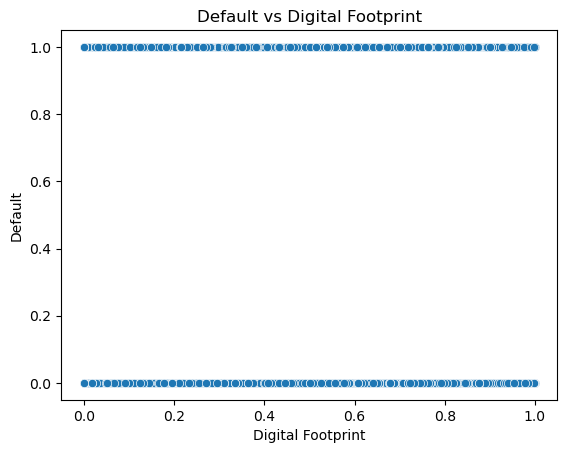

In [6]:
sns.scatterplot(data=df, x="digital3", y="default")
plt.xlabel("Digital Footprint")
plt.ylabel("Default")
plt.title("Default vs Digital Footprint")
plt.show()


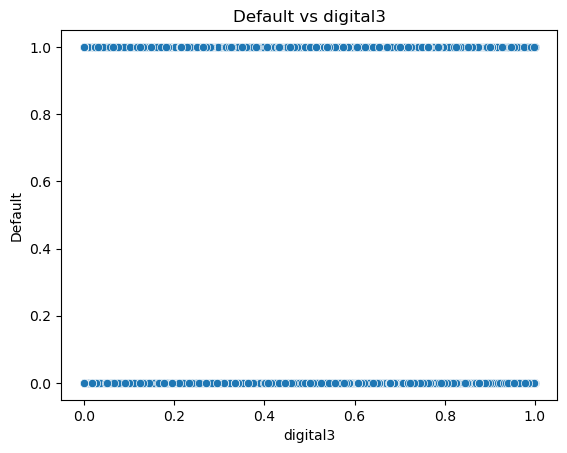

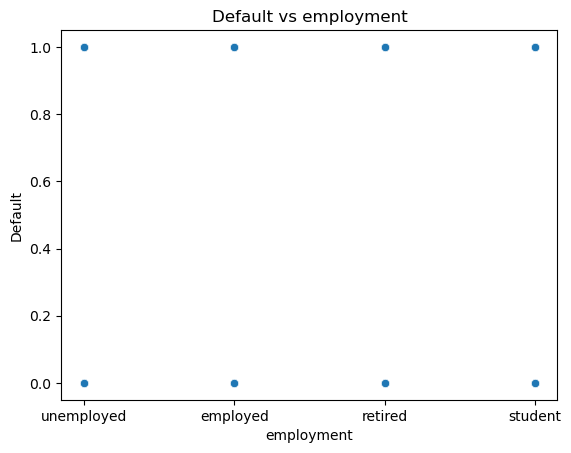

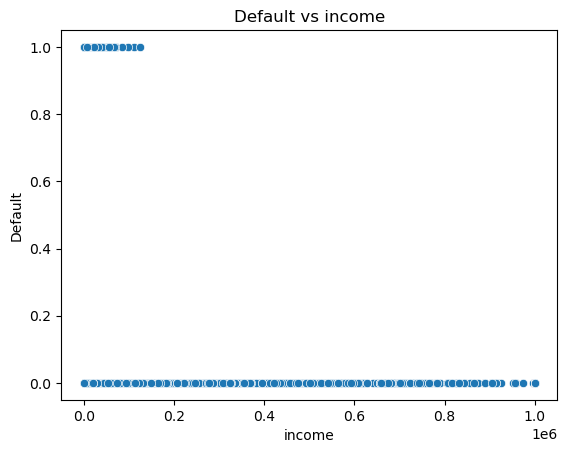

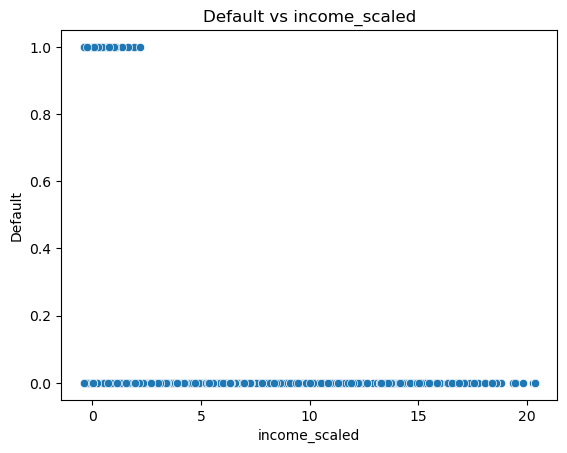

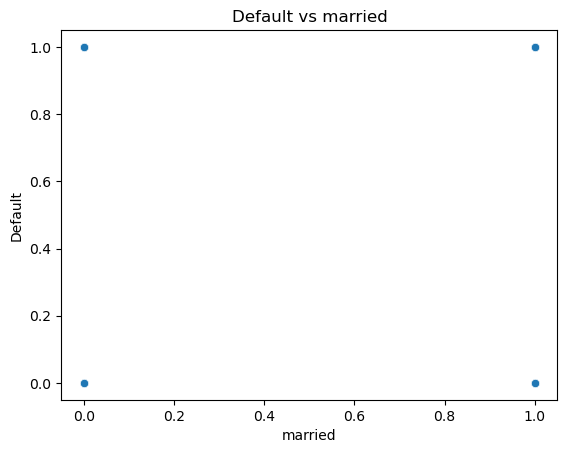

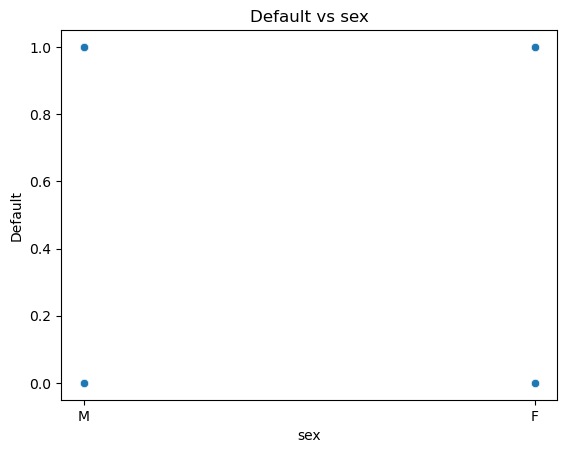

In [7]:
variables_to_plot = df.columns.difference(["default", "digital1", "digital2"])

for var in variables_to_plot:
    sns.scatterplot(data=df, x=var, y="default")
    plt.xlabel(var)
    plt.ylabel("Default")
    plt.title(f"Default vs {var}")
    plt.show()

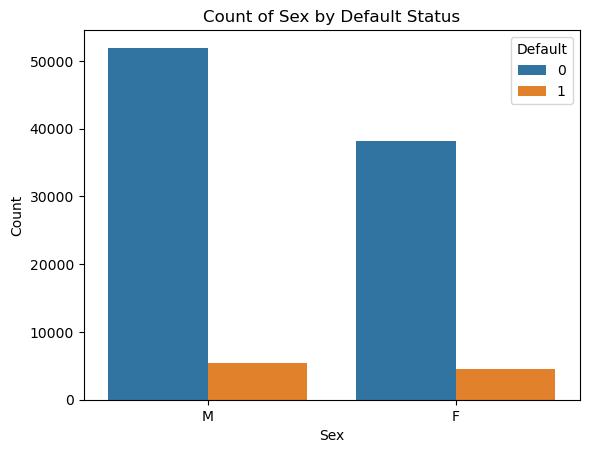

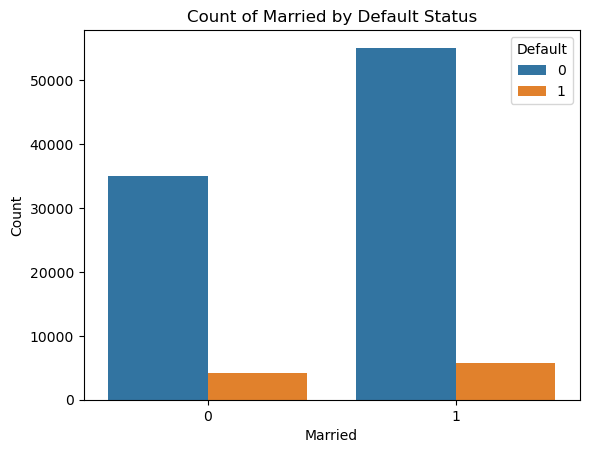

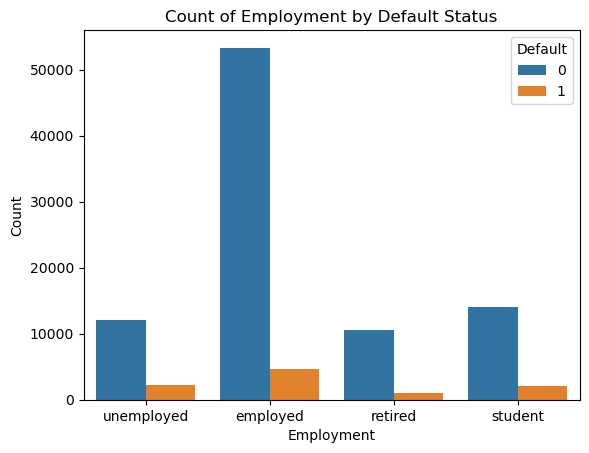

In [8]:
categorical_features = ["sex", "married", "employment"]

for feature in categorical_features:
    sns.countplot(data=df, x=feature, hue="default")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Count")
    plt.title(f"Count of {feature.capitalize()} by Default Status")
    plt.legend(title="Default")
    plt.show()

In [15]:
df = pd.get_dummies(df, columns=["sex", "employment"], drop_first=True)

In [16]:
df

,married,income,digital1,digital2,digital3,default,income_scaled,income_log,sex_M,employment_retired,employment_student,employment_unemployed
0,0,0,0.749267,0.422656,0.738735,0,-0.387029,0.000000,True,False,False,True
1,1,26108,0.697428,0.596361,0.733947,0,0.154879,10.170035,True,False,False,False
2,1,11810,0.000000,0.652496,0.000000,0,-0.141896,9.376787,True,False,False,False
3,1,0,0.000000,0.000000,0.000000,0,-0.387029,0.000000,True,False,False,True
4,1,6310,0.000000,0.041123,0.203202,0,-0.256056,8.750049,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,4564,0.000000,0.333091,0.876951,0,-0.292297,8.426174,False,False,True,False
99996,0,18882,0.000000,0.367979,0.556855,0,0.004893,9.846017,True,False,False,False
99997,1,19121,0.858688,0.508737,0.722149,0,0.009854,9.858595,True,False,False,False
99998,1,53563,0.736672,0.328757,0.000000,0,0.724745,10.888632,True,False,False,False


In [17]:
X = df.drop(columns=["default", "digital1", "digital2", "income"])
y = df["default"]


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    roc_auc_score,
    balanced_accuracy_score,
    roc_curve,
    auc,
)
from sklearn.metrics import confusion_matrix


              precision    recall  f1-score   support

           0       0.96      0.58      0.72     18011
           1       0.17      0.76      0.27      1989

    accuracy                           0.60     20000
   macro avg       0.56      0.67      0.50     20000
weighted avg       0.88      0.60      0.68     20000

Accuracy:  0.59785
Balanced Accuracy:  0.6696049442328676


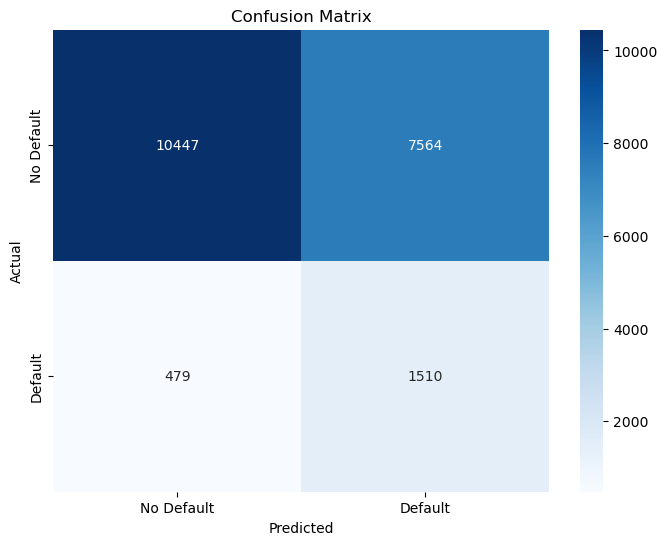

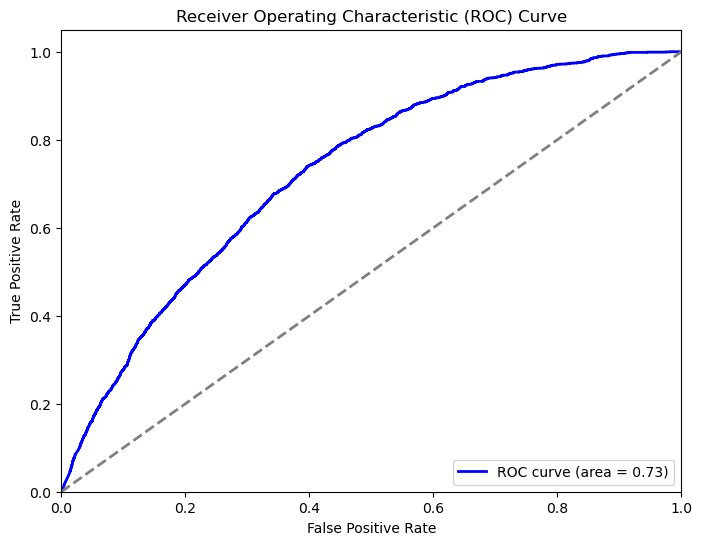

In [25]:
model = LogisticRegression(max_iter=3000, class_weight="balanced")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_rf, tpr_rf, color="blue", lw=2, label=f"ROC curve (area = {roc_auc_rf:.2f})"
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [24]:
X_test_df = pd.DataFrame(
    X_test, columns=X_train.columns
)  # Assuming you have column names

# False Positives: Predicted default (1) but actual is no default (0)
false_positives = X_test_df[(y_pred == 1) & (y_test == 0)]
# False Negatives: Predicted no default (0) but actual is default (1)
false_negatives = X_test_df[(y_pred == 0) & (y_test == 1)]

# Let's examine a few false positives and false negatives
print("False Positives (predicted default, actual no default):")
false_positives.head()


False Positives (predicted default, actual no default):


,married,digital3,income_scaled,sex_M,employment_retired,employment_student,employment_unemployed,income_log
77965,0,0.917228,-0.387029,True,False,True,False,0.000000
10820,0,0.638163,-0.209582,True,False,False,False,9.053687
57092,0,0.496471,-0.231750,True,False,False,False,8.920255
74261,0,0.998668,-0.387029,False,False,True,False,0.000000
64108,0,0.755991,-0.387029,False,False,True,False,0.000000


In [25]:
print("False Negatives (predicted no default, actual default):")
false_negatives.head()


False Negatives (predicted no default, actual default):


,married,digital3,income_scaled,sex_M,employment_retired,employment_student,employment_unemployed,income_log
99179,0,0.506021,-0.184197,False,False,False,False,9.187379
48927,0,0.374336,-0.169689,True,True,False,False,9.256460
64421,1,0.460577,-0.189553,False,False,False,False,9.160625
50247,1,0.007144,-0.099387,True,False,False,False,9.536690
64793,1,0.874541,-0.248418,True,False,False,True,8.806724


In [26]:
# Feature importance (coefficients) for logistic regression
importance = pd.DataFrame(
    {"Feature": X_train.columns, "Coefficient": model.coef_[0]}
).sort_values(by="Coefficient", ascending=False)

# Print top 10 important features
print("Top 10 positive features influencing default predictions:")
print(importance.head(10))

print("Top 10 negative features influencing no-default predictions:")
print(importance.tail(10))


Top 10 positive features influencing default predictions:
                 Feature  Coefficient
3                  sex_M     0.002151
7             income_log    -0.049421
0                married    -0.064888
6  employment_unemployed    -0.264516
4     employment_retired    -0.566461
5     employment_student    -0.590831
1               digital3    -0.825902
2          income_scaled    -4.344281
Top 10 negative features influencing no-default predictions:
                 Feature  Coefficient
3                  sex_M     0.002151
7             income_log    -0.049421
0                married    -0.064888
6  employment_unemployed    -0.264516
4     employment_retired    -0.566461
5     employment_student    -0.590831
1               digital3    -0.825902
2          income_scaled    -4.344281


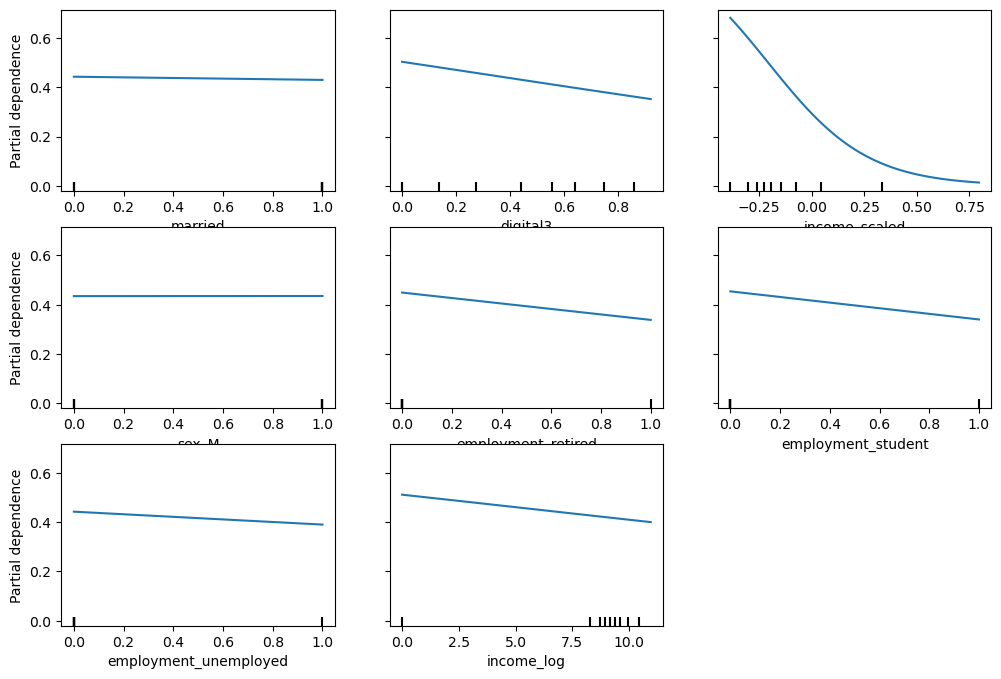

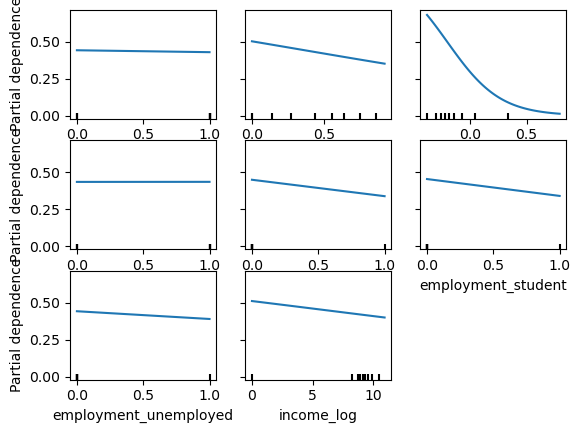

In [27]:
from sklearn.inspection import PartialDependenceDisplay

# Partial dependence plot for all features
fig, ax = plt.subplots(figsize=(12, 8))
display = PartialDependenceDisplay.from_estimator(
    model, X_train, features=X_train.columns, response_method="predict_proba"
)
display.plot(ax=ax)
plt.show()


In [28]:
import shap

# Initialize SHAP explainer
explainer = shap.LinearExplainer(model, X_train)


In [29]:
# Calculate SHAP values for test set
shap_values = explainer.shap_values(X_test)


In [30]:
shap_values = shap_values.astype(float)


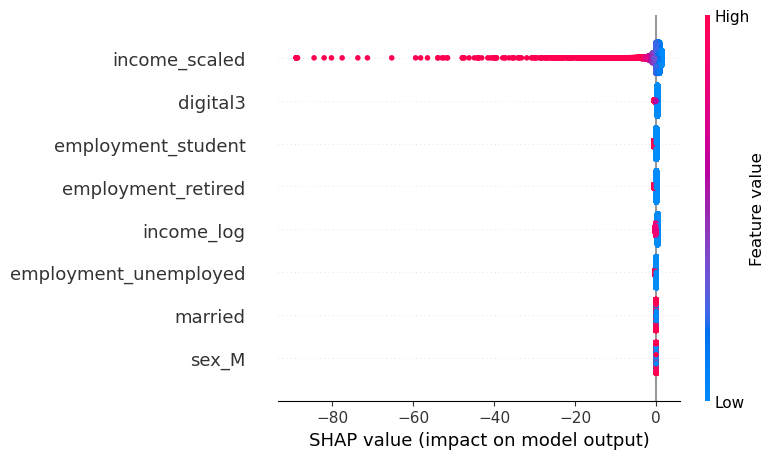

In [31]:
# Plot SHAP values for the first few test samples
shap.summary_plot(shap_values, X_test, feature_names=X_train.columns)


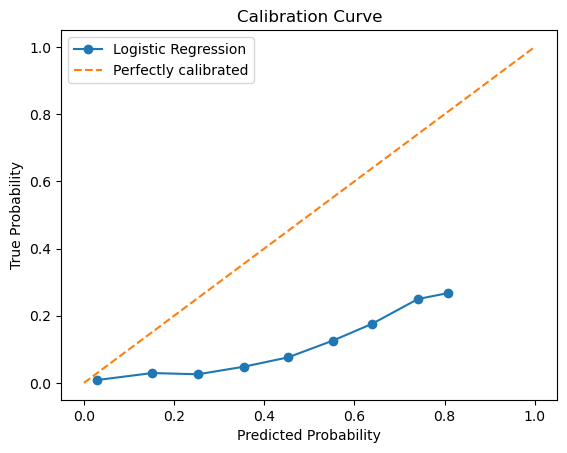

In [32]:
from sklearn.calibration import calibration_curve

# Calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)

plt.plot(prob_pred, prob_true, marker="o", label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfectly calibrated")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve")
plt.legend()
plt.show()


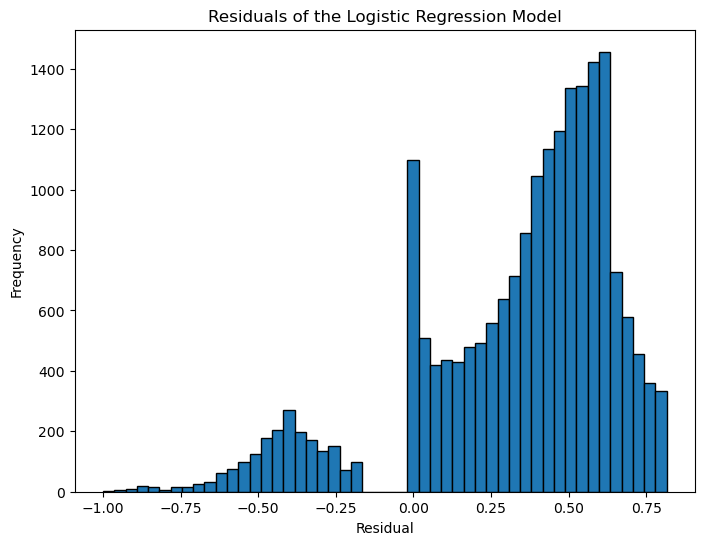

In [33]:
# Calculate residuals
residuals = y_pred_proba - y_test

# Plot residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, edgecolor="black")
plt.title("Residuals of the Logistic Regression Model")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


In [38]:
import warnings

warnings.filterwarnings("ignore")

In [43]:
# Hyperparameter tuning with cross-validation
import optuna
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score


# Define the objective function
def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        "C": trial.suggest_loguniform("C", 1e-10, 1e10),
        "max_iter": trial.suggest_int("max_iter", 100, 10000),
        "solver": trial.suggest_categorical("solver", ["liblinear", "lbfgs", "saga"]),
    }

    # Initialize the model
    model = LogisticRegression(class_weight="balanced", random_state=42, **params)

    # Suppress warnings for convergence issues
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)

        # Calculate the cross-validation score
        auc_scores = cross_val_score(
            model, X_train, y_train, cv=5, scoring=make_scorer(roc_auc_score)
        )

    # Return the mean F1 score
    return auc_scores.mean()


In [44]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2024-10-17 10:50:58,987] A new study created in memory with name: no-name-7b5c4d09-1898-42d5-910a-680fd9b25521
[I 2024-10-17 10:50:59,469] Trial 0 finished with value: 0.6698173303425661 and parameters: {'C': 112.74842523237089, 'max_iter': 6158, 'solver': 'liblinear'}. Best is trial 0 with value: 0.6698173303425661.
[I 2024-10-17 10:51:00,010] Trial 1 finished with value: 0.6698103897540042 and parameters: {'C': 809.7181061202897, 'max_iter': 6817, 'solver': 'liblinear'}. Best is trial 0 with value: 0.6698173303425661.
[I 2024-10-17 10:51:00,541] Trial 2 finished with value: 0.6007868408939516 and parameters: {'C': 2.633529705094457e-08, 'max_iter': 5735, 'solver': 'saga'}. Best is trial 0 with value: 0.6698173303425661.
[I 2024-10-17 10:51:01,391] Trial 3 finished with value: 0.6698103902356884 and parameters: {'C': 15191.620071469557, 'max_iter': 8164, 'solver': 'saga'}. Best is trial 0 with value: 0.6698173303425661.
[I 2024-10-17 10:51:01,879] Trial 4 finished with value: 0.669

In [45]:
best_params = study.best_params

              precision    recall  f1-score   support

           0       0.96      0.58      0.72     18011
           1       0.17      0.76      0.27      1989

    accuracy                           0.60     20000
   macro avg       0.56      0.67      0.50     20000
weighted avg       0.88      0.60      0.68     20000

Accuracy:  0.59765
Balanced Accuracy:  0.6694939009815213


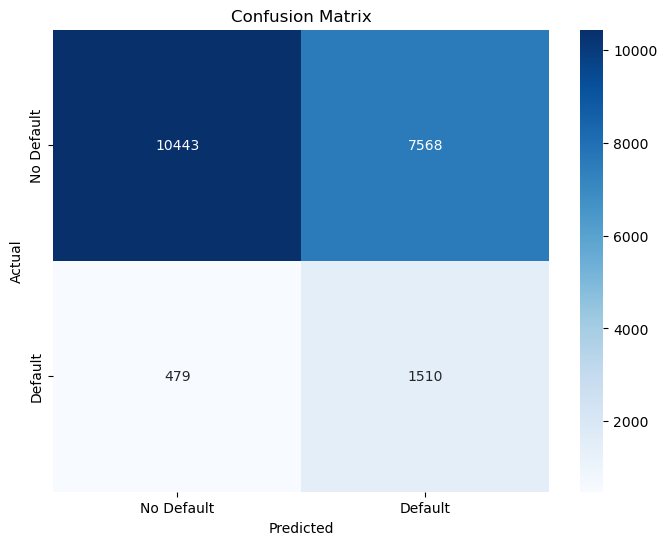

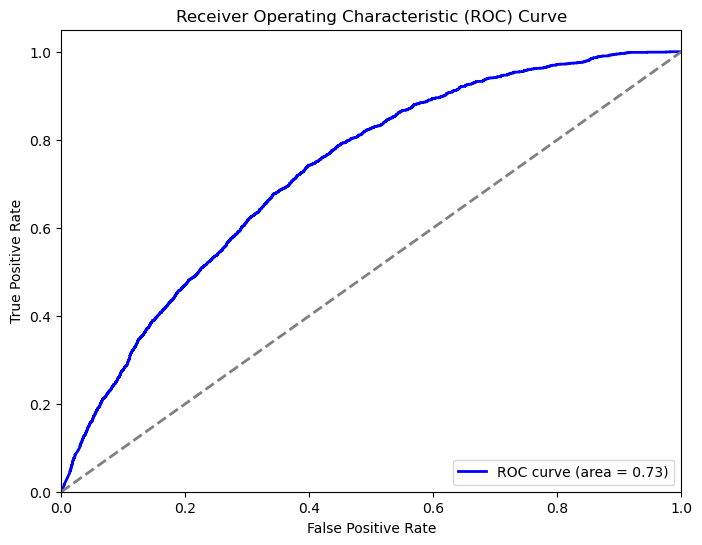

In [46]:
tuned_lr = LogisticRegression(class_weight="balanced", random_state=42, **best_params)

tuned_lr.fit(X_train, y_train)

y_pred_tuned = tuned_lr.predict(X_test)

print(classification_report(y_test, y_pred_tuned))

print("Accuracy: ", accuracy_score(y_test, y_pred_tuned))

print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred_tuned))

conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_tuned,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


y_pred_proba_tuned = tuned_lr.predict_proba(X_test)[:, 1]

fpr_rf_tuned, tpr_rf_tuned, _ = roc_curve(y_test, y_pred_proba_tuned)

roc_auc_rf_tuned = auc(fpr_rf_tuned, tpr_rf_tuned)
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_rf_tuned,
    tpr_rf_tuned,
    color="blue",
    lw=2,
    label=f"ROC curve (area = {roc_auc_rf_tuned:.2f})",
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [47]:
# Optimize probability threshold
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_tuned)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Locate the index of the largest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print("Best Threshold:", best_threshold)

Best Threshold: 0.607979868593667


              precision    recall  f1-score   support

           0       0.93      0.81      0.87     18011
           1       0.21      0.46      0.29      1989

    accuracy                           0.78     20000
   macro avg       0.57      0.63      0.58     20000
weighted avg       0.86      0.78      0.81     20000



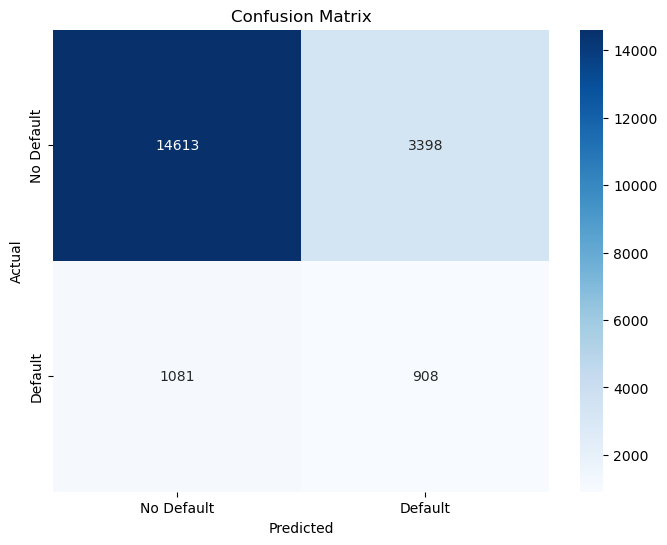

In [56]:
#  Predictions using the best threshold

y_pred_best_threshold = (y_pred_proba_tuned >= best_threshold).astype(int)

print(classification_report(y_test, y_pred_best_threshold))

conf_matrix_best_threshold = confusion_matrix(y_test, y_pred_best_threshold)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_best_threshold,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample


def plot_lift_curve(y_true, y_proba, pos_label=1):
    """
    Plots the lift curve for a given set of true labels and predicted probabilities.

    Parameters:
    - y_true: True binary labels.
    - y_proba: Predicted probabilities for the positive class.
    - pos_label: Label of the positive class.
    """
    # Sort true labels by predicted probabilities
    data = np.array(list(zip(y_true, y_proba)))
    data = data[data[:, 1].argsort()[::-1]]  # Sort by proba in descending order
    sorted_y_true = data[:, 0]

    # Calculate cumulative gains
    cumulative_gains = np.cumsum(sorted_y_true == pos_label) / np.sum(
        sorted_y_true == pos_label
    )
    cumulative_percentile = np.arange(1, len(y_true) + 1) / len(y_true)

    # Plot the lift curve
    plt.figure(figsize=(8, 6))
    plt.plot(cumulative_percentile, cumulative_gains, label="Lift Curve", color="blue")
    plt.plot(
        [0, 1], [0, 1], label="Baseline", linestyle="--", color="red"
    )  # Baseline (random guess)
    plt.xlabel("Proportion of Sample")
    plt.ylabel("Proportion of Positives Captured")
    plt.title("Lift Curve")
    plt.legend()
    plt.grid(True)
    plt.show()


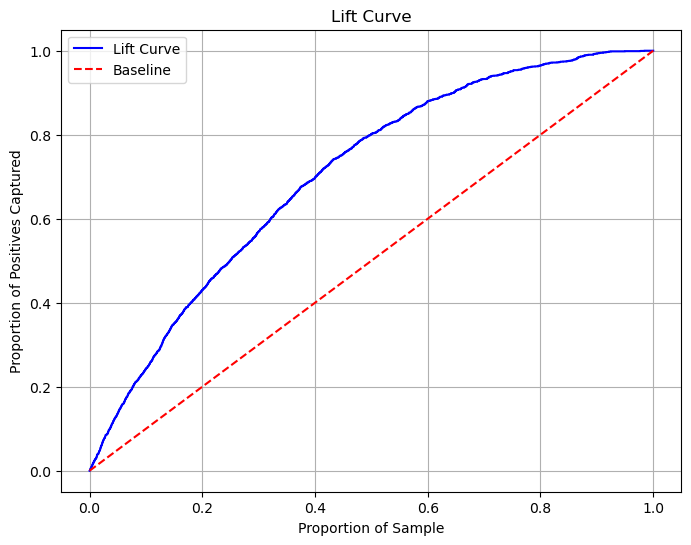

In [52]:
y_proba = tuned_lr.predict_proba(X_test)[
    :, 1
]  # Predicted probabilities for the positive class
plot_lift_curve(y_test, y_proba)


In [53]:
from sklearn.metrics import roc_curve


def find_optimal_cutoff(y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    J = tpr - fpr  # Youden's J statistic
    optimal_idx = np.argmax(J)  # Find the index where J is maximum
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold


# Example usage:
optimal_threshold = find_optimal_cutoff(y_test, y_proba)
print("Optimal Threshold (Youden's J):", optimal_threshold)


Optimal Threshold (Youden's J): 0.5106552721872326


              precision    recall  f1-score   support

           0       0.95      0.60      0.74     18011
           1       0.17      0.74      0.28      1989

    accuracy                           0.62     20000
   macro avg       0.56      0.67      0.51     20000
weighted avg       0.88      0.62      0.69     20000



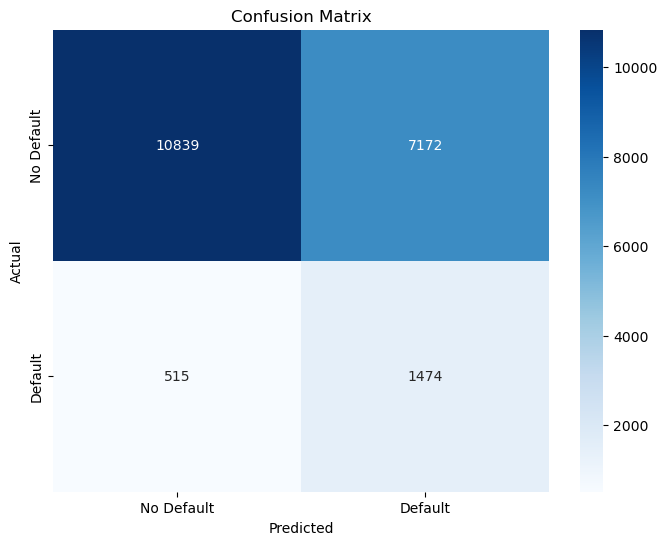

In [57]:
# Predictions using the optimal threshold

y_pred_optimal_threshold = (y_proba >= optimal_threshold).astype(int)

print(classification_report(y_test, y_pred_optimal_threshold))

conf_matrix_optimal_threshold = confusion_matrix(y_test, y_pred_optimal_threshold)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_optimal_threshold,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [60]:
from sklearn.metrics import precision_score, recall_score

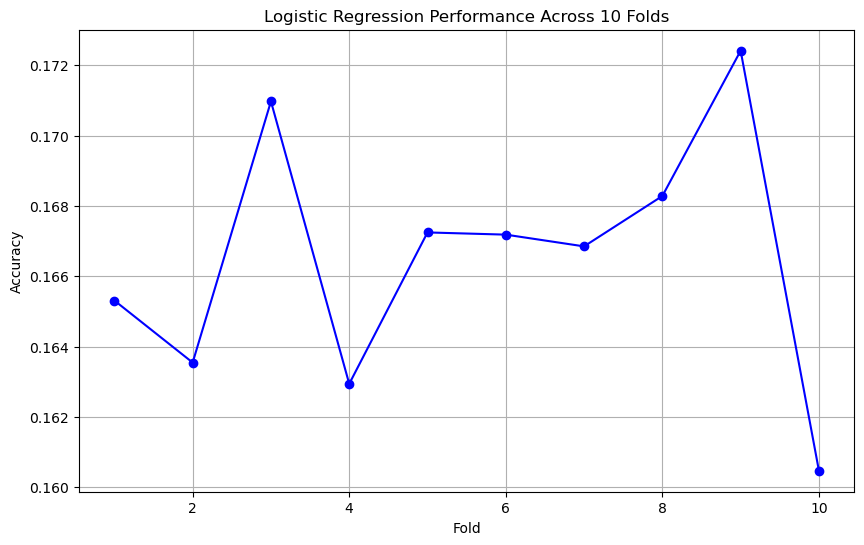

Mean CV Accuracy: 0.1665
Standard Deviation of CV Accuracy: 0.0034


In [61]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring=make_scorer(precision_score))

# Plot the cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cv_scores, marker="o", linestyle="-", color="b")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Performance Across 10 Folds")
plt.grid(True)
plt.show()

# Print the mean and standard deviation of the cross-validation scores
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")

In [62]:
from imblearn.ensemble import EasyEnsembleClassifier

# Initialize the EasyEnsembleClassifier
eec = EasyEnsembleClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model
eec.fit(X_train, y_train)


EasyEnsembleClassifier(n_estimators=100, n_jobs=-1, random_state=42)

              precision    recall  f1-score   support

           0       0.96      0.52      0.68     18011
           1       0.16      0.81      0.26      1989

    accuracy                           0.55     20000
   macro avg       0.56      0.67      0.47     20000
weighted avg       0.88      0.55      0.63     20000

Accuracy:  0.54945
Balanced Accuracy:  0.6650946565557572


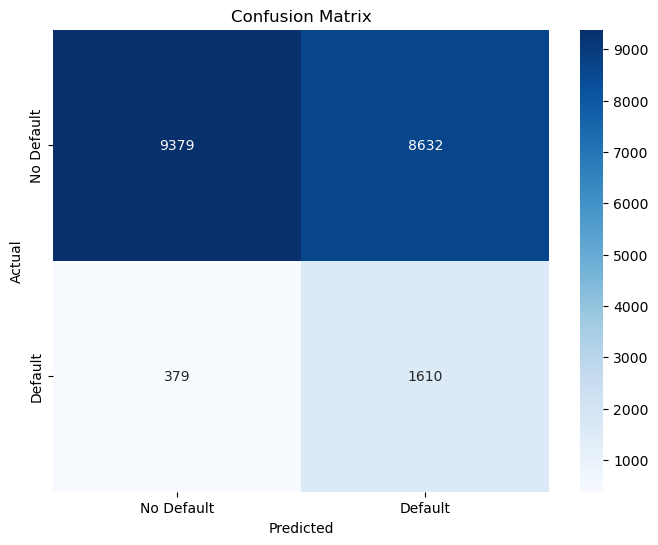

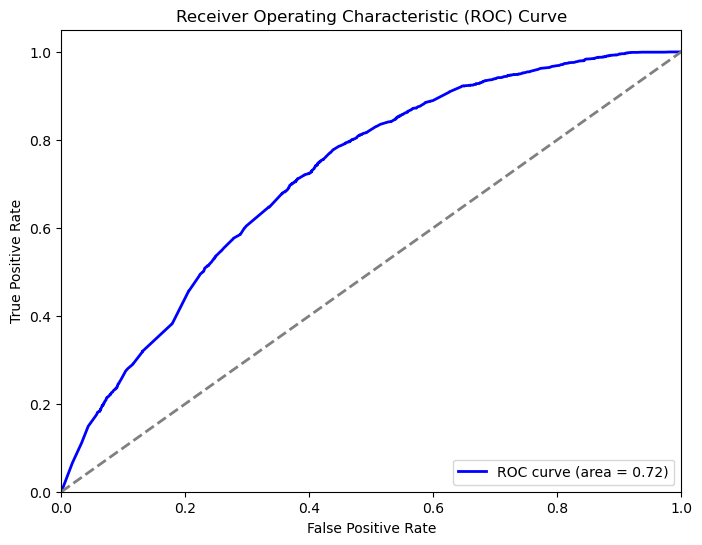

In [63]:
y_pred_eec = eec.predict(X_test)

print(classification_report(y_test, y_pred_eec))

print("Accuracy: ", accuracy_score(y_test, y_pred_eec))

print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred_eec))

conf_matrix_eec = confusion_matrix(y_test, y_pred_eec)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_eec,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


y_pred_proba_eec = eec.predict_proba(X_test)[:, 1]

fpr_rf_eec, tpr_rf_eec, _ = roc_curve(y_test, y_pred_proba_eec)

roc_auc_rf_eec = auc(fpr_rf_eec, tpr_rf_eec)
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_rf_eec,
    tpr_rf_eec,
    color="blue",
    lw=2,
    label=f"ROC curve (area = {roc_auc_rf_eec:.2f})",
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


              precision    recall  f1-score   support

           0       0.96      0.59      0.73     18011
           1       0.17      0.76      0.28      1989

    accuracy                           0.60     20000
   macro avg       0.56      0.67      0.50     20000
weighted avg       0.88      0.60      0.68     20000

Accuracy:  0.6041
Balanced Accuracy:  0.6719569368800067


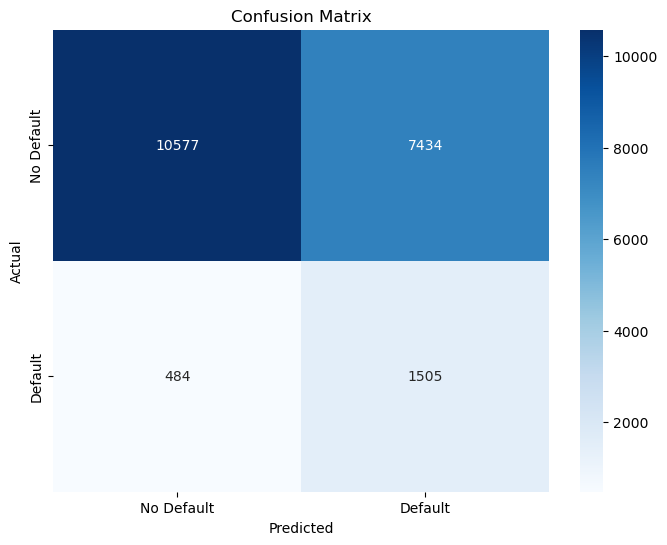

In [64]:
from imblearn.ensemble import RUSBoostClassifier

# Initialize the RUSBoostClassifier
rusboost = RUSBoostClassifier(n_estimators=100, random_state=42)

# Fit the model
rusboost.fit(X_train, y_train)

y_pred_rusboost = rusboost.predict(X_test)

print(classification_report(y_test, y_pred_rusboost))

print("Accuracy: ", accuracy_score(y_test, y_pred_rusboost))

print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred_rusboost))

conf_matrix_rusboost = confusion_matrix(y_test, y_pred_rusboost)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_rusboost,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


              precision    recall  f1-score   support

           0       0.96      0.59      0.73     18011
           1       0.17      0.75      0.27      1989

    accuracy                           0.60     20000
   macro avg       0.56      0.67      0.50     20000
weighted avg       0.88      0.60      0.68     20000

Accuracy:  0.6023
Balanced Accuracy:  0.6689449514945045


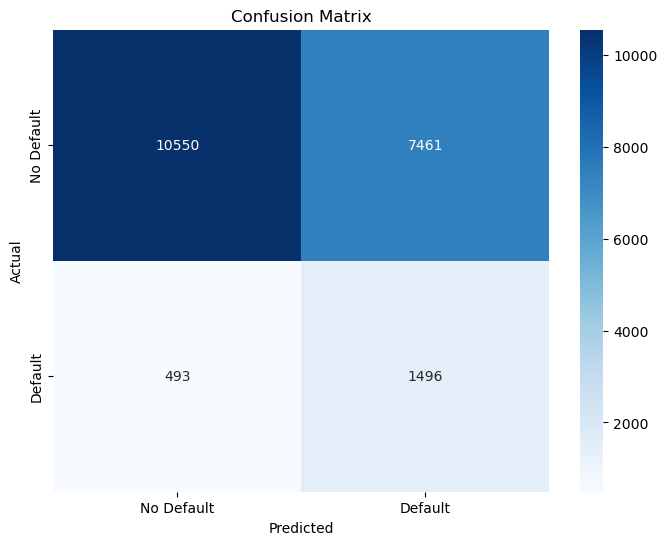

In [65]:
# Undersample the majority class

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Initialize the model
model_resampled = LogisticRegression(class_weight="balanced", random_state=42)

# Fit the model
model_resampled.fit(X_resampled, y_resampled)

y_pred_resampled = model_resampled.predict(X_test)

print(classification_report(y_test, y_pred_resampled))

print("Accuracy: ", accuracy_score(y_test, y_pred_resampled))

print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred_resampled))

conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_resampled,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [72]:
from sklearn.tree import DecisionTreeClassifier

# Example usage for classification
model = DecisionTreeClassifier(criterion="gini", max_depth=3, class_weight="balanced")
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [73]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

print("Accuracy: ", accuracy_score(y_test, y_pred))

print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.58      0.72     18011
           1       0.16      0.75      0.27      1989

    accuracy                           0.59     20000
   macro avg       0.56      0.66      0.49     20000
weighted avg       0.88      0.59      0.67     20000

Accuracy:  0.59455
Balanced Accuracy:  0.6637475383388829


              precision    recall  f1-score   support

           0       0.91      0.94      0.92     18011
           1       0.22      0.16      0.19      1989

    accuracy                           0.86     20000
   macro avg       0.56      0.55      0.55     20000
weighted avg       0.84      0.86      0.85     20000

Accuracy:  0.85955
Balanced Accuracy:  0.5487951067498861


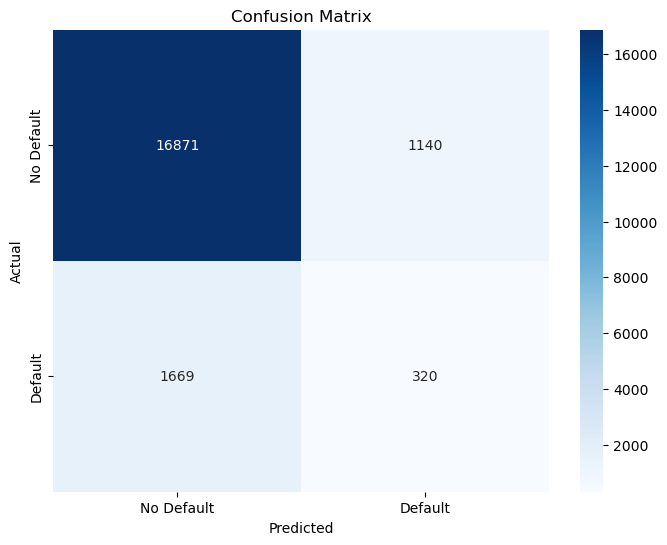

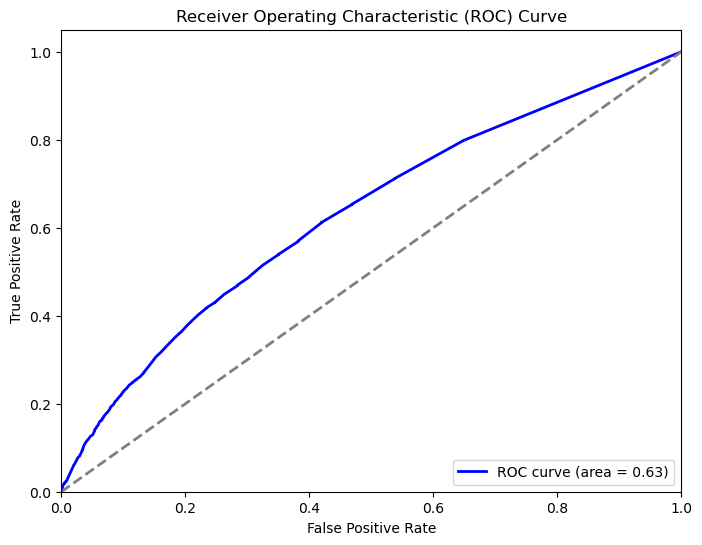

In [74]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")

# Fit the model

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

print("Accuracy: ", accuracy_score(y_test, y_pred_rf))

print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_rf,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_rf, tpr_rf, color="blue", lw=2, label=f"ROC curve (area = {roc_auc_rf:.2f})"
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [75]:
# Threshold optimization

optimal_threshold_rf = find_optimal_cutoff(y_test, y_pred_proba_rf)
print("Optimal Threshold (Youden's J):", optimal_threshold_rf)


Optimal Threshold (Youden's J): 0.037155812397056606


In [76]:
## Predictions using the optimal threshold

y_pred_optimal_threshold_rf = (y_pred_proba_rf >= optimal_threshold_rf).astype(int)

print(classification_report(y_test, y_pred_optimal_threshold_rf))


              precision    recall  f1-score   support

           0       0.93      0.58      0.72     18011
           1       0.14      0.61      0.23      1989

    accuracy                           0.58     20000
   macro avg       0.54      0.60      0.47     20000
weighted avg       0.85      0.58      0.67     20000



In [1]:
df

NameError: name 'df' is not defined